In [2]:
import random

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from joblib import dump, load
from os import listdir
from os.path import isfile, join

In [3]:
class0_folder = "data/right_hand_palm_segmented"
class1_folder = "data/right_hand_fist_segmented"
class0_paths = [join(class0_folder, f) for f in listdir(class0_folder) if isfile(join(class0_folder, f))]
class1_paths = [join(class1_folder, f) for f in listdir(class1_folder) if isfile(join(class1_folder, f))]

(150, 150, 3)
[0. 0. 0.]
0.0


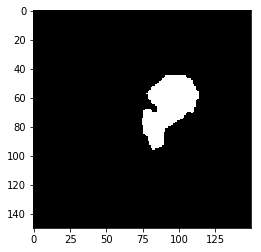

In [4]:
test_img = plt.imread(class1_paths[0])
plt.figure()
plt.imshow(test_img)

print(test_img.shape)
print(test_img[60,75])
test_img = np.sum(test_img, axis=2)/3
print(test_img[60,75])

In [5]:
# Read all images.
class0_imgs = [plt.imread(f) for f in class0_paths]
class1_imgs = [plt.imread(f) for f in class1_paths]
all_imgs = class0_imgs + class1_imgs

# They're read in RGB format, but all values are [0 0 0] or [1 1 1] so we can binarize them like this.
binarized_imgs = [np.sum(img, axis=2)/3 for img in all_imgs]

# Shuffle the images along with their labels.
all_imgs_and_labels = list(zip(binarized_imgs, np.append(np.zeros(len(class0_imgs)).astype(np.uint8), np.ones(len(class1_imgs)).astype(np.uint8))))
random.shuffle(all_imgs_and_labels)

# Reshape the data in order to be fitted.
imgs, labels = zip(*all_imgs_and_labels)
n_samples = len(imgs)
data = np.array(imgs).reshape((n_samples, -1))
print(data.shape)

NameError: name 'cv2' is not defined

In [17]:
# Split the training and testing data.
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25)

In [19]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(kernel='rbf', gamma=0.001)

# Train the classifier on half of the data.
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
# Now predict on the other half of the data.
expected = y_test
predicted = classifier.predict(X_test)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       130
           1       0.90      0.91      0.90       109

   micro avg       0.91      0.91      0.91       239
   macro avg       0.91      0.91      0.91       239
weighted avg       0.91      0.91      0.91       239


Confusion matrix:
[[119  11]
 [ 10  99]]


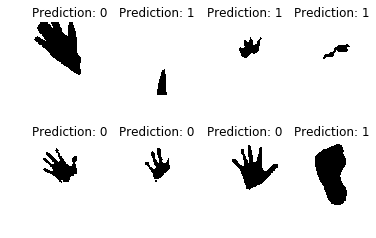

[0 1 1 1 1 0 1 1]
[0 1 1 1 1 1 1 1]


In [16]:
images_and_predictions = list(zip(X_test, predicted))
for index, (image, prediction) in enumerate(images_and_predictions[20:28]):
    plt.subplot(2, 4, index+1)
    plt.axis('off')
    plt.imshow(image.reshape((150,150)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()
print(np.array(expected[:8]).astype(np.uint8))
print(np.array(predicted[:8]).astype(np.uint8))

In [ ]:
# Let's also try a random forest for the lulz.
rf_classifier = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
rf_classifier.fit(X_train, y_train)

In [ ]:
expected = y_test
predicted = rf_classifier.predict(X_test)
print("Classification report for classifier %s:\n%s\n"
      % (rf_classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

In [ ]:
images_and_predictions = list(zip(X_test, predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:8]):
    plt.subplot(2, 4, index+1)
    plt.axis('off')
    plt.imshow(image.reshape((150,150)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()
print(np.array(expected[:8]).astype(np.uint8))
print(np.array(predicted[:8]).astype(np.uint8))

In [ ]:
# Let's see how to get probabilistic results from the classifier.
classifier = svm.SVC(probability=True, gamma=0.001, kernel='linear')
classifier.fit(data, labels)

In [ ]:
classifier_input = test_img.reshape((1,-1))
print(classifier.predict(classifier_input))
print(classifier.predict_proba(classifier_input))

In [ ]:
classifier_input = (np.sum(class0_imgs[20],axis=2)/3).reshape((1,-1))
print(classifier.predict(classifier_input))
print(classifier.predict_proba(classifier_input))

classifier_input = (np.sum(class1_imgs[20],axis=2)/3).reshape((1,-1))
print(classifier.predict(classifier_input))
print(classifier.predict_proba(classifier_input))

In [ ]:
# Save the classifier, as training a probabilistic one seems to take around a minute.
dump(classifier, 'models/hand_classifier_v3_linear.joblib') 

In [ ]:
def init_svm_classifier():
    """
    Summary of all code above.
    """

    # Read all segmented images.
    class0_folder = "data/right_hand_palm_segmented"
    class1_folder = "data/right_hand_fist_segmented"
    class0_paths = [join(class0_folder, f) for f in listdir(class0_folder) if isfile(join(class0_folder, f))]
    class1_paths = [join(class1_folder, f) for f in listdir(class1_folder) if isfile(join(class1_folder, f))]
    class0_imgs = [plt.imread(f) for f in class0_paths]
    class1_imgs = [plt.imread(f) for f in class1_paths]

    # Put the dataset together. Then binarize the images (they're RGB but only with [0,0,0] and [1,1,1] values).
    # Then shuffle the dataset.
    all_imgs = class0_imgs + class1_imgs
    binarized_imgs = [np.sum(img, axis=2)/3 for img in all_imgs]
    labels = np.append(np.zeros(len(class0_imgs)).astype(np.uint8), np.ones(len(class1_imgs)).astype(np.uint8))
    all_imgs_and_labels = list(zip(binarized_imgs, labels))
    random.shuffle(all_imgs_and_labels)

    # Now reshape the data in order to feed it to the classifier.
    imgs, labels = zip(*all_imgs_and_labels)
    n_samples = len(imgs)
    data = np.array(imgs).reshape((n_samples, -1))

    # Create a SVM classifier and fit it to the entire dataset (no need for train/test split, now we're actually
    # making a "production" model).
    classifier = svm.SVC(gamma=0.001)
    classifier.fit(data, labels)

    return classifier

In [ ]:
# Try a logistic regression?
logistic_classifier = LogisticRegression()

In [ ]:
logistic_classifier.fit(data, labels)

In [ ]:
classifier_input = (np.sum(class0_imgs[20],axis=2)/3).reshape((1,-1))
print(np.min(classifier_input))
print(classifier.predict(classifier_input))
print(classifier.predict_proba(classifier_input))

classifier_input = (np.sum(class1_imgs[20],axis=2)/3).reshape((1,-1))
print(classifier.predict(classifier_input))
print(classifier.predict_proba(classifier_input))

In [ ]:
dump(logistic_classifier, 'models/hand_classifier_v2_logistic.joblib') 